# Validation

## RQ1

|| NDCG@20 | val_loss |
|:---|:---|:---|
| Representation-based (no interaction) | 0.637610 | 0.594731 |
| Concat (implicit interaction) | 0.642920 | **0.578215** |
| NRM-F (explicit interaction) | **0.648260** | 0.579019 |

## RQ2

|| NDCG@20 | val_loss |
|:---|:---|:---|
| NRM-F (query-field) | 0.648260 | 0.579019 |
| NRM-F (all) | 0.640340 | 0.577872 |
| FM (query-field) | **0.667430** | 0.573853 |
| FM (all) | 0.661630 | **0.572881** |

In [1]:
import os
import datetime
import itertools
import numpy as np
import pandas as pd
from functools import reduce
from tqdm import tqdm
from pandas import DataFrame

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # RQ1
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_ebr_results.csv ../data/results/cookpad_ebr_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_naive_results.csv ../data/results/cookpad_naive_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_nrmf_simple_query_results.csv ../data/results/cookpad_nrmf_simple_query_results.csv

# # RQ2
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_nrmf_simple_query_results.csv ../data/results/cookpad_nrmf_simple_query_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_nrmf_simple_all_results.csv ../data/results/cookpad_nrmf_simple_all_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_fwfm_all_results.csv ../data/results/cookpad_fwfm_all_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_fwfm_query_results.csv ../data/results/cookpad_fwfm_query_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_nrmf_simple_query_with_1st_results.csv ../data/results/cookpad_nrmf_simple_query_with_1st_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_nrmf_simple_all_with_1st_results.csv ../data/results/cookpad_nrmf_simple_all_with_1st_results.csv
# !gsutil cp -r gs://master-thesis-data/logs/cookpad_fwfm_all_without_1st_results.csv ../data/results/cookpad_fwfm_all_without_1st_results.csv

# # RQ3
# !gsutil cp -r gs://master-thesis-data/logs/fwfm_selected_results_2.csv ../data/results/cookpad_fwfm_selected_results_2.csv

In [3]:
results_dir = '../data/results'
dataset = 'cookpad'

def read_csv(model_name):
    return pd.read_csv(f'{results_dir}/{dataset}_{model_name}_results.csv')

In [4]:
ebr_df = read_csv('ebr')
ebr_df.rename(columns={'ndcg': 'ndcg (repr)', 'val_loss': 'val_loss (repr)'}, inplace=True)
ebr_df.drop(columns=['model'], inplace=True)
display(ebr_df)
ebr_df.mean()

,dataset_id,val_loss (repr),ndcg (repr)
0,0,0.560538,0.6458
1,1,0.621549,0.6008
2,2,0.547659,0.6680
3,3,0.613529,0.6452
4,4,0.604749,0.6234
5,5,0.636486,0.6198
6,6,0.583815,0.6400
7,7,0.572042,0.6493
8,8,0.631309,0.6399
9,9,0.575639,0.6439


dataset_id         4.500000
val_loss (repr)    0.594731
ndcg (repr)        0.637610
dtype: float64

In [5]:
naive_df = read_csv('naive')
naive_df.rename(columns={'ndcg': 'ndcg (concat)', 'val_loss': 'val_loss (concat)'}, inplace=True)
naive_df.drop(columns=['model'], inplace=True)
display(naive_df)
naive_df.mean()

,dataset_id,val_loss (concat),ndcg (concat)
0,0,0.567106,0.6582
1,1,0.565372,0.6550
2,2,0.565405,0.6416
3,3,0.578052,0.6451
4,4,0.579186,0.6316
5,5,0.589296,0.6273
6,6,0.592155,0.6371
7,7,0.581431,0.6390
8,8,0.582457,0.6476
9,9,0.581690,0.6467


dataset_id           4.500000
val_loss (concat)    0.578215
ndcg (concat)        0.642920
dtype: float64

In [6]:
nrmf_df = read_csv('nrmf_simple_query')
nrmf_df.rename(columns={'ndcg': 'ndcg (nrmf)', 'val_loss': 'val_loss (nrmf)'}, inplace=True)
nrmf_df.drop(columns=['model'], inplace=True)
display(nrmf_df)
nrmf_df.mean()

,dataset_id,val_loss (nrmf),ndcg (nrmf)
0,0,0.570938,0.6516
1,1,0.568919,0.6534
2,2,0.565205,0.6624
3,3,0.578468,0.6440
4,4,0.583903,0.6395
5,5,0.587036,0.6430
6,6,0.592896,0.6375
7,7,0.581339,0.6451
8,8,0.579235,0.6499
9,9,0.582250,0.6562


dataset_id         4.500000
val_loss (nrmf)    0.579019
ndcg (nrmf)        0.648260
dtype: float64

In [7]:
df = reduce(lambda a, b: a.merge(b, on='dataset_id'), [ebr_df, naive_df, nrmf_df])
df

,dataset_id,val_loss (repr),ndcg (repr),val_loss (concat),ndcg (concat),val_loss (nrmf),ndcg (nrmf)
0,0,0.560538,0.6458,0.567106,0.6582,0.570938,0.6516
1,1,0.621549,0.6008,0.565372,0.6550,0.568919,0.6534
2,2,0.547659,0.6680,0.565405,0.6416,0.565205,0.6624
3,3,0.613529,0.6452,0.578052,0.6451,0.578468,0.6440
4,4,0.604749,0.6234,0.579186,0.6316,0.583903,0.6395
5,5,0.636486,0.6198,0.589296,0.6273,0.587036,0.6430
6,6,0.583815,0.6400,0.592155,0.6371,0.592896,0.6375
7,7,0.572042,0.6493,0.581431,0.6390,0.581339,0.6451
8,8,0.631309,0.6399,0.582457,0.6476,0.579235,0.6499
9,9,0.575639,0.6439,0.581690,0.6467,0.582250,0.6562


<AxesSubplot:>

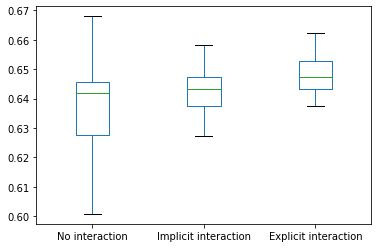

In [8]:
temp = df.rename(columns={'ndcg (repr)': 'No interaction', 'ndcg (concat)': 'Implicit interaction', 'ndcg (nrmf)': 'Explicit interaction'})
temp.boxplot(column=['No interaction', 'Implicit interaction', 'Explicit interaction'], grid=False)

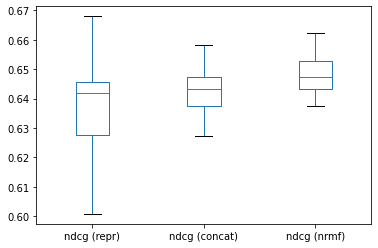

,sum_sq,df,F,PR(>F)
C(treatments),0.000567,2.0,1.699631,0.201725
Residual,0.004505,27.0,NaN,NaN



POST HOC TESTS

A              B              mean(A)    mean(B)    diff     se       T    p-tukey    cohen
-------------  -----------  ---------  ---------  ------  -----  ------  ---------  -------
ndcg (concat)  ndcg (nrmf)      0.643      0.648  -0.005  0.006  -0.924      0.616   -0.413
ndcg (concat)  ndcg (repr)      0.643      0.638   0.005  0.006   0.919      0.619    0.411
ndcg (nrmf)    ndcg (repr)      0.648      0.638   0.011  0.006   1.844      0.159    0.825


POST HOC TESTS

Contrast    A              B              Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust      BF10    cohen
----------  -------------  -------------  --------  ------------  ------  ------  ---------  -------  --------  ----------  ------  -------
treatments  ndcg (repr)    ndcg (concat)  False     True          -0.801  18.000  two-sided    0.433     1.000  bonf         0.498   -0.358
treatments  ndcg (repr)    ndcg (nrmf)    False     True          -1.670  18.000  two

In [9]:
def validate(target):
    columns = [f'{target} ({model})' for model in ['repr', 'concat', 'nrmf']]
    df.boxplot(column=columns, grid=False)
    plt.show()
    
    melted_df = pd.melt(df.reset_index(), id_vars=['index'], value_vars=columns)
    melted_df.columns = ['index', 'treatments', 'value']
    
    model = ols('value ~ C(treatments)', data=melted_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)
    
    posthoc = pg.pairwise_tukey(
        data=melted_df,
        dv='value',
        between='treatments',
        effsize='cohen',
    )
    pg.print_table(posthoc, floatfmt='.3f')
    
    posthoc = pg.pairwise_ttests(
        data=melted_df,
        dv='value',
        between='treatments',
        parametric=True,
        padjust='bonf',
        effsize='cohen',
    )
    pg.print_table(posthoc, floatfmt='.3f')
    

validate('ndcg')

In [10]:
nrmf_all_df = read_csv('nrmf_simple_all')
nrmf_all_df.rename(columns={'ndcg': 'ndcg (nrmf_all)', 'val_loss': 'val_loss (nrmf_all)'}, inplace=True)
nrmf_all_df.drop(columns=['model'], inplace=True)
display(nrmf_all_df)
nrmf_all_df.mean()

,dataset_id,val_loss (nrmf_all),ndcg (nrmf_all)
0,0,0.571766,0.6319
1,1,0.563052,0.6496
2,2,0.563116,0.6547
3,3,0.578947,0.6308
4,4,0.580107,0.6362
5,5,0.587787,0.6369
6,6,0.590426,0.6349
7,7,0.578637,0.6442
8,8,0.580489,0.6439
9,9,0.584392,0.6403


dataset_id             4.500000
val_loss (nrmf_all)    0.577872
ndcg (nrmf_all)        0.640340
dtype: float64

In [11]:
fwfm_df = read_csv('fwfm_query')
fwfm_df.rename(columns={'ndcg': 'ndcg (fwfm)', 'val_loss': 'val_loss (fwfm)'}, inplace=True)
fwfm_df.drop(columns=['model'], inplace=True)
display(fwfm_df)
fwfm_df.mean()

,dataset_id,val_loss (fwfm),ndcg (fwfm)
0,0,0.564829,0.6784
1,1,0.557583,0.6819
2,2,0.562629,0.6750
3,3,0.570332,0.6701
4,4,0.573857,0.6607
5,5,0.583908,0.6570
6,6,0.590096,0.6496
7,7,0.575512,0.6652
8,8,0.579188,0.6690
9,9,0.580599,0.6674


dataset_id         4.500000
val_loss (fwfm)    0.573853
ndcg (fwfm)        0.667430
dtype: float64

In [12]:
fwfm_all_df = read_csv('fwfm_all')
fwfm_all_df.rename(columns={'ndcg': 'ndcg (fwfm_all)', 'val_loss': 'val_loss (fwfm_all)'}, inplace=True)
fwfm_all_df.drop(columns=['model'], inplace=True)
display(fwfm_all_df)
fwfm_all_df.mean()

,dataset_id,val_loss (fwfm_all),ndcg (fwfm_all)
0,0,0.563889,0.6711
1,1,0.559096,0.6705
2,2,0.559837,0.6708
3,3,0.570679,0.6632
4,4,0.572271,0.6545
5,5,0.585707,0.6499
6,6,0.588101,0.6438
7,7,0.575052,0.6601
8,8,0.576402,0.6665
9,9,0.577771,0.6659


dataset_id             4.500000
val_loss (fwfm_all)    0.572881
ndcg (fwfm_all)        0.661630
dtype: float64

In [13]:
fwfm_selected_df = read_csv('fwfm_selected')
fwfm_selected_df.rename(columns={'ndcg': 'ndcg (fwfm_selected)', 'val_loss': 'val_loss (fwfm_selected)'}, inplace=True)
fwfm_selected_df.drop(columns=['model'], inplace=True)
display(fwfm_selected_df)
fwfm_selected_df.mean()

,dataset_id,val_loss (fwfm_selected),ndcg (fwfm_selected)
0,0,0.561829,0.6732
1,1,0.556284,0.6784
2,2,0.561928,0.6680
3,3,0.569117,0.6657
4,4,0.576897,0.6585
5,5,0.584535,0.6521
6,6,0.587232,0.6486
7,7,0.575805,0.6633
8,8,0.574202,0.6706
9,9,0.574930,0.6682


dataset_id                  4.500000
val_loss (fwfm_selected)    0.572276
ndcg (fwfm_selected)        0.664660
dtype: float64

In [14]:
nrmf_with_1st_df = read_csv('nrmf_simple_query_with_1st')
nrmf_with_1st_df.rename(columns={'ndcg': 'ndcg (nrmf_with_1st)', 'val_loss': 'val_loss (nrmf_with_1st)'}, inplace=True)
nrmf_with_1st_df.drop(columns=['model'], inplace=True)
display(nrmf_with_1st_df)
nrmf_with_1st_df.mean()

,dataset_id,val_loss (nrmf_with_1st),ndcg (nrmf_with_1st)
0,0,0.564715,0.6560
1,1,0.561043,0.6534
2,2,0.563704,0.6581
3,3,0.575802,0.6461
4,4,0.578200,0.6417
5,5,0.583823,0.6466
6,6,0.591661,0.6281
7,7,0.580500,0.6397
8,8,0.580618,0.6534
9,9,0.579680,0.6489


dataset_id                  4.500000
val_loss (nrmf_with_1st)    0.575975
ndcg (nrmf_with_1st)        0.647200
dtype: float64

In [15]:
fwfm_without_1st_df = read_csv('fwfm_all_without_1st')
fwfm_without_1st_df.rename(columns={'ndcg': 'ndcg (fwfm_without_1st)', 'val_loss': 'val_loss (fwfm_without_1st)'}, inplace=True)
fwfm_without_1st_df.drop(columns=['model'], inplace=True)
display(fwfm_without_1st_df)
fwfm_without_1st_df.mean()

,dataset_id,val_loss (fwfm_without_1st),ndcg (fwfm_without_1st)
0,0,0.584380,0.6241
1,1,0.582001,0.6226
2,2,0.579838,0.6275
3,3,0.591708,0.6180
4,4,0.591026,0.6225
5,5,0.601528,0.6153
6,6,0.603448,0.6127
7,7,0.593417,0.6260
8,8,0.597277,0.6278
9,9,0.596716,0.6322


dataset_id                     4.500000
val_loss (fwfm_without_1st)    0.592134
ndcg (fwfm_without_1st)        0.622870
dtype: float64

In [16]:
df = reduce(lambda a, b: a.merge(b, on='dataset_id'), [nrmf_df, nrmf_all_df, fwfm_df, fwfm_all_df, fwfm_selected_df, nrmf_with_1st_df, fwfm_without_1st_df])
df

,dataset_id,val_loss (nrmf),ndcg (nrmf),val_loss (nrmf_all),ndcg (nrmf_all),val_loss (fwfm),ndcg (fwfm),val_loss (fwfm_all),ndcg (fwfm_all),val_loss (fwfm_selected),ndcg (fwfm_selected),val_loss (nrmf_with_1st),ndcg (nrmf_with_1st),val_loss (fwfm_without_1st),ndcg (fwfm_without_1st)
0,0,0.570938,0.6516,0.571766,0.6319,0.564829,0.6784,0.563889,0.6711,0.561829,0.6732,0.564715,0.6560,0.584380,0.6241
1,1,0.568919,0.6534,0.563052,0.6496,0.557583,0.6819,0.559096,0.6705,0.556284,0.6784,0.561043,0.6534,0.582001,0.6226
2,2,0.565205,0.6624,0.563116,0.6547,0.562629,0.6750,0.559837,0.6708,0.561928,0.6680,0.563704,0.6581,0.579838,0.6275
3,3,0.578468,0.6440,0.578947,0.6308,0.570332,0.6701,0.570679,0.6632,0.569117,0.6657,0.575802,0.6461,0.591708,0.6180
4,4,0.583903,0.6395,0.580107,0.6362,0.573857,0.6607,0.572271,0.6545,0.576897,0.6585,0.578200,0.6417,0.591026,0.6225
5,5,0.587036,0.6430,0.587787,0.6369,0.583908,0.6570,0.585707,0.6499,0.584535,0.6521,0.583823,0.6466,0.601528,0.6153
6,6,0.592896,0.6375,0.590426,0.6349,0.590096,0.6496,0.588101,0.6438,0.587232,0.6486,0.591661,0.6281,0.603448,0.6127
7,7,0.581339,0.6451,0.578637,0.6442,0.575512,0.6652,0.575052,0.6601,0.575805,0.6633,0.580500,0.6397,0.593417,0.6260
8,8,0.579235,0.6499,0.580489,0.6439,0.579188,0.6690,0.576402,0.6665,0.574202,0.6706,0.580618,0.6534,0.597277,0.6278
9,9,0.582250,0.6562,0.584392,0.6403,0.580599,0.6674,0.577771,0.6659,0.574930,0.6682,0.579680,0.6489,0.596716,0.6322


<AxesSubplot:>

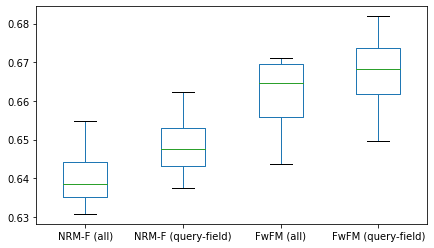

In [17]:
temp = df.rename(columns={
    'ndcg (nrmf_all)': 'NRM-F (all)',
    'ndcg (nrmf)': 'NRM-F (query-field)',
    'ndcg (fwfm)': 'FwFM (query-field)',
    'ndcg (fwfm_all)': 'FwFM (all)',
#     'ndcg (fwfm_selected)': 'FwFM (selected)',
})
plt.figure(figsize=(7,4))
temp.boxplot(column=[
    'NRM-F (all)',
    'NRM-F (query-field)',
    'FwFM (all)',
    'FwFM (query-field)',
#     'FwFM (selected)'
], grid=False)

<AxesSubplot:>

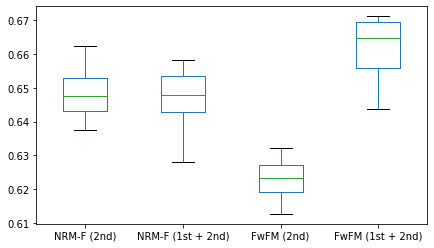

In [18]:
temp = df.rename(columns={
    'ndcg (nrmf)': 'NRM-F (2nd)',
    'ndcg (nrmf_with_1st)': 'NRM-F (1st + 2nd)',
    'ndcg (fwfm_all)': 'FwFM (1st + 2nd)',
    'ndcg (fwfm_without_1st)': 'FwFM (2nd)',
})
plt.figure(figsize=(7,4))
temp.boxplot(column=['NRM-F (2nd)', 'NRM-F (1st + 2nd)', 'FwFM (2nd)', 'FwFM (1st + 2nd)'], grid=False)

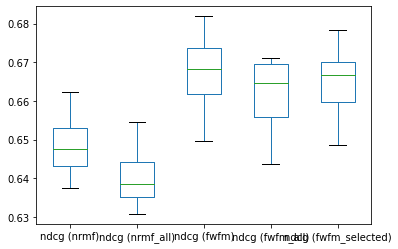

,sum_sq,df,F,PR(>F)
C(treatments),0.005414,4.0,17.165519,1.288387e-08
Residual,0.003548,45.0,NaN,NaN



POST HOC TESTS

A                     B                       mean(A)    mean(B)    diff     se       T    p-tukey    cohen
--------------------  --------------------  ---------  ---------  ------  -----  ------  ---------  -------
ndcg (fwfm)           ndcg (fwfm_all)           0.667      0.662   0.006  0.004   1.461      0.575    0.653
ndcg (fwfm)           ndcg (fwfm_selected)      0.667      0.665   0.003  0.004   0.698      0.900    0.312
ndcg (fwfm)           ndcg (nrmf)               0.667      0.648   0.019  0.004   4.827      0.001    2.159
ndcg (fwfm)           ndcg (nrmf_all)           0.667      0.640   0.027  0.004   6.822      0.001    3.051
ndcg (fwfm_all)       ndcg (fwfm_selected)      0.662      0.665  -0.003  0.004  -0.763      0.900   -0.341
ndcg (fwfm_all)       ndcg (nrmf)               0.662      0.648   0.013  0.004   3.367      0.008    1.506
ndcg (fwfm_all)       ndcg (nrmf_all)           0.662      0.640   0.021  0.004   5.361      0.001    2.398
ndcg (fwfm_

In [19]:
def validate(target):
    columns = [f'{target} ({model})' for model in ['nrmf', 'nrmf_all', 'fwfm', 'fwfm_all', 'fwfm_selected']]
    df.boxplot(column=columns, grid=False)
    plt.show()
    
    melted_df = pd.melt(df.reset_index(), id_vars=['index'], value_vars=columns)
    melted_df.columns = ['index', 'treatments', 'value']
    
    model = ols('value ~ C(treatments)', data=melted_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)
    
    posthoc = pg.pairwise_tukey(
        data=melted_df,
        dv='value',
        between='treatments',
        effsize='cohen',
    )
    pg.print_table(posthoc, floatfmt='.3f')
    
    posthoc = pg.pairwise_ttests(
        data=melted_df,
        dv='value',
        between='treatments',
        parametric=True,
        padjust='bonf',
        effsize='cohen',
    )
    pg.print_table(posthoc, floatfmt='.3f')
    

validate('ndcg')

In [20]:
df = reduce(lambda a, b: a.merge(b, on='dataset_id'), [naive_df, nrmf_df, nrmf_all_df, fwfm_df, fwfm_all_df, fwfm_selected_df])
df

,dataset_id,val_loss (concat),ndcg (concat),val_loss (nrmf),ndcg (nrmf),val_loss (nrmf_all),ndcg (nrmf_all),val_loss (fwfm),ndcg (fwfm),val_loss (fwfm_all),ndcg (fwfm_all),val_loss (fwfm_selected),ndcg (fwfm_selected)
0,0,0.567106,0.6582,0.570938,0.6516,0.571766,0.6319,0.564829,0.6784,0.563889,0.6711,0.561829,0.6732
1,1,0.565372,0.6550,0.568919,0.6534,0.563052,0.6496,0.557583,0.6819,0.559096,0.6705,0.556284,0.6784
2,2,0.565405,0.6416,0.565205,0.6624,0.563116,0.6547,0.562629,0.6750,0.559837,0.6708,0.561928,0.6680
3,3,0.578052,0.6451,0.578468,0.6440,0.578947,0.6308,0.570332,0.6701,0.570679,0.6632,0.569117,0.6657
4,4,0.579186,0.6316,0.583903,0.6395,0.580107,0.6362,0.573857,0.6607,0.572271,0.6545,0.576897,0.6585
5,5,0.589296,0.6273,0.587036,0.6430,0.587787,0.6369,0.583908,0.6570,0.585707,0.6499,0.584535,0.6521
6,6,0.592155,0.6371,0.592896,0.6375,0.590426,0.6349,0.590096,0.6496,0.588101,0.6438,0.587232,0.6486
7,7,0.581431,0.6390,0.581339,0.6451,0.578637,0.6442,0.575512,0.6652,0.575052,0.6601,0.575805,0.6633
8,8,0.582457,0.6476,0.579235,0.6499,0.580489,0.6439,0.579188,0.6690,0.576402,0.6665,0.574202,0.6706
9,9,0.581690,0.6467,0.582250,0.6562,0.584392,0.6403,0.580599,0.6674,0.577771,0.6659,0.574930,0.6682


In [21]:
def test1(df, target, models, multiple=False):
    columns = [f'{target} ({model})' for model in models]
    rows = []
    for c1, c2 in itertools.combinations(columns, 2):
        pvalue = stats.ttest_rel(df[c1], df[c2]).pvalue
        if multiple:
            pvalue *= len(models)
            if pvalue > 1:
                pvalue = 1.0
        rows.append({
            'A': c1,
            'B': c2,
            'pvalue': round(pvalue, 4)
        })
    pvalue_df = DataFrame(rows)
    display(pvalue_df)
    
test1(df, 'ndcg', ['fwfm', 'fwfm_all'], multiple=False)

,A,B,pvalue
0,ndcg (fwfm),ndcg (fwfm_all),0.0001


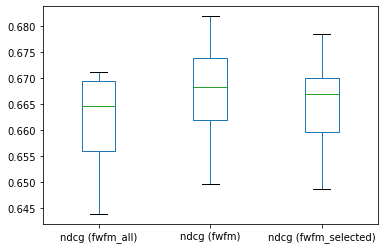

,sum_sq,df,F,PR(>F)
C(treatments),0.000168,2.0,0.925034,0.408723
Residual,0.002456,27.0,NaN,NaN



POST HOC TESTS

A                B                       mean(A)    mean(B)    diff     se       T    p-tukey    cohen
---------------  --------------------  ---------  ---------  ------  -----  ------  ---------  -------
ndcg (fwfm)      ndcg (fwfm_all)           0.667      0.662   0.006  0.004   1.360      0.365    0.608
ndcg (fwfm)      ndcg (fwfm_selected)      0.667      0.665   0.003  0.004   0.649      0.775    0.290
ndcg (fwfm_all)  ndcg (fwfm_selected)      0.662      0.665  -0.003  0.004  -0.710      0.740   -0.318


POST HOC TESTS

Contrast    A                B                     Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust      BF10    cohen
----------  ---------------  --------------------  --------  ------------  ------  ------  ---------  -------  --------  ----------  ------  -------
treatments  ndcg (fwfm_all)  ndcg (fwfm)           False     True          -1.343  18.000  two-sided    0.196     0.588  bonf         0.739   -0.601
tre

In [22]:
def test2(df, target, models):
    columns = [f'{target} ({model})' for model in models]
    plt.figure(figsize=(6,4))
    df.boxplot(column=columns, grid=False)
    plt.show()
    
    melted_df = pd.melt(df.reset_index(), id_vars=['index'], value_vars=columns)
    melted_df.columns = ['index', 'treatments', 'value']
    
    model = ols('value ~ C(treatments)', data=melted_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)
    
    posthoc = pg.pairwise_tukey(
        data=melted_df,
        dv='value',
        between='treatments',
        effsize='cohen',
    )
    pg.print_table(posthoc, floatfmt='.3f')
    
    posthoc = pg.pairwise_ttests(
        data=melted_df,
        dv='value',
        between='treatments',
        parametric=True,
        padjust='bonf',
        effsize='cohen',
    )
    pg.print_table(posthoc, floatfmt='.3f')
    
test2(df, 'ndcg', ['fwfm_all', 'fwfm', 'fwfm_selected'])